#### Introdução

Esse projeto visa quantificar o impacto das chuvas na precificação de fertilizantes em estoque.

A precificação se pode subdividir em oferta e demanda.

A oferta no mercado brasileiro de fertilizantes é dominada pela importação.  

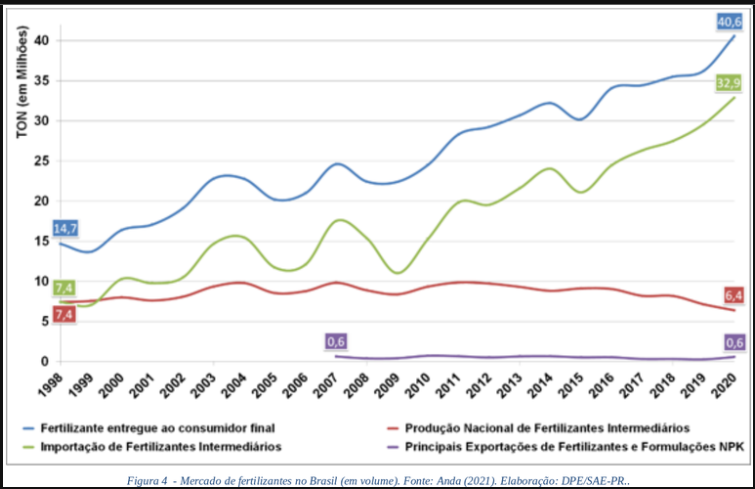

Trataremos a oferta como a importação.

A precificação então passa a ser o balanço entre demanda e importação.

Qualquer fator que pressione assimetricamente os lados deste balanço, altera a precificação.

A influência das chuvas na demanda de fertilizantes é inegável e dispensa considerações. 

As importações acabam seguindo a demanda e são influenciadas pelas chuvas também.  

Porém, existe uma assimetria do efeito das chuvas sobre os lados do balanço!  

As chuvas podem impactar a demanda de forma imediata, e não podem fazer o mesmo com a importação.

Por impacto imediato na demanda podemos exemplificar como uma chuva forte alagando o terreno e impedindo o trânsito de máquinas para a adubação.

Porém, as chuvas não podem impactar as importações na mesma velocidade, já que os produtos são despachados com semanas ou meses de antecedência pelos países exportadores, e em trânsito certamente não podem ter seus volumes alterados.

Entre o momento de um impacto e outro, cria-se um viés de preço devido às chuvas.

Para se quantificar o efeito das chuvas no preço dos fertilizantes seria necessário conhecer:  
* chuva  
* oferta  
* demanda  
    

Chuvas: dados abertos fornecidos pelo [INMET - Instituo Nacional de Meteorologia](https://portal.inmet.gov.br/).

Oferta: dados abertos sobre **importações**, fornecidos pelo [Comex Stat - Portal para acesso gratuito às estatísticas de comércio exterior do Brasil](https://comexstat.mdic.gov.br/pt/home).

Demanda: dados não são abertos, mas são registrados e controlados pela associação das empresas importadoras, a ANDA (www.anda.org.br).

Como o autor no momento não possui acesso aos dados sobre demanda, não é possível a ele calcular o impacto das chuvas diretamente sobre a precificação.

Porém, com os dados abertos acima listados, é possível fazer parte do cálculo de precificação, no caso, é possível fazer o cálculo do **impacto das chuvas nas importações de fertilizantes**.

In [1]:
# Executa
%run '1. Asking an interesting question.ipynb'



Os dados sobre chuvas podem aumentar a precisão das previsões de importação de fertilizantes?



Teste da Hipótese:

	Testemunha: Previsão com base somente no histórico de importação.

	Tratamento: Previsão com base no histórico de importação e de volumes de chuvas

	Teste estatístico:

		* Diferença entre o erro (mae) da testemunha e do tratamento

		* mae_test - mae_tratamento

	Ho: O teste estatístico é igual a zero
	Ha: O teste estatístico é maior que zero ("Right Tail Teste")

	A significância estatística considerada será de 0.05






In [2]:
# Executa
%run '2. Obtain the data.ipynb'



	2.1 Importação de Fertilizantes




Fonte: Comexstat(http://comexstat.mdic.gov.br/pt/geral), portal para acesso gratuito às estatísticas de
comércio exterior do Brasil, com os dados utilizados para construção da balança comercial brasileira, detalhados
por NCM ou por Municípios do exportador/importador.



Na tabelas auxiliares, na lista de categorias de produtos mais abrangente (SH2), foi localizado um produto de nome "fertilizante"
e de código igual a 31.

Esse nome e código serão utilizados para filtrar a extração dos registros do arquivo compactado IMP_COMPLETA.zip,
disponibilizado pelo site.




Em nome da simplicidade, esse projeto abordará uma única unidade federativa do Brasil.

A Bahia foi a unidade federativa escolhida pelo autor para foco deste projeto.

Serão somente salvas as importações destinadas a este estado brasileiro.

O arquivo filtrado foi salvo localmente.




	2.1 Volumes de Chuvas




No Estado da Bahia o INMET mantém várias estações meteorológicas automática



3.1 Fertilizantes



Primeiras linhas da tabela



,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_FRETE,VL_SEGURO
0,1997,1,31042090,10,23,BA,1,517600,59,59400,10128,5824,41
1,1997,2,31043010,10,383,BA,1,517600,63,62950,25180,4950,0



Verifica-se que em cada linha da tabela é apresentada uma importação segmentada por fatores. O interesse deste projeto
é somente o peso desembarcado a cada mês na Bahia e por isso todos os demais fatores serão descartados e a tabela sera
agrupada em ano, mês e as quantidades de peso. Antes disso, porém, será procedida uma busca por erros, duplicatas e valores nulos


Não há valores nulos na tabela



Análise Visual de Normalidade:
Será executada utilizando-se apenas "5 bins", sendo de conhecimento do autor que muito mais limpezas poderiam fazer.
É bom lembrar que o objetivo do trabalho não é fazer a precisão mais precisa possível e sim comparar previsão com e sem chuva.




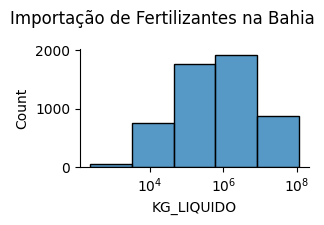



3.2 Chuvas




KeyError: 'date'

KeyError: 'date'

In [1]:
# Executa
%run '3. Explore the data.ipynb'

In [5]:
# Executa
%run '4. Model the data.ipynb'


As importações foram fundidas as chuvas adiantadas em 7 meses.

Testes de previsão serão executados considerando o tempo de treino de 10 anos.

Cada mês, devido a sazonalidade, será considerado um tratamento, e por isso, a repetição dos testes serão os anos.

Temos 21.6 anos de registros para processamento e o tempo de treino vai utilizar 10 anos, restam
11.6 anos para repetição dos testes. Ou seja, algununs meses terão 11, outros 12 repetições.

A previsão será obtida por regressão de floresta randômica.



Como chegamos numa fase de análise visual dos números, a unidade de medida foi alterada para quilotonelada ou kton




,kton,kton_pred_tratamento,kton_pred_testemunha,erro_tratamento,erro_testemunha
120,91,82,83,9,8
121,22,80,83,57,60
122,46,58,74,11,27
123,94,75,53,19,41
124,100,41,55,59,45




Os resultado dos testes foram salvos e no próximo capítulo poderemos análisar estatísticamente se há diferença
entre utilizar ou não as chuvas como variável adicional no cálculo de previsão de importação de fertilizantes.






Antes de visualizar os resultados dos testes, vamos rever a questão ou a hipótese
que foram a razão de se proceder os testes.



-------------------------REVISÃO-------------------------


Os dados sobre chuvas podem aumentar a precisão das previsões de importação de fertilizantes?



Teste da Hipótese:

	Testemunha: Previsão com base somente no histórico de importação.

	Tratamento: Previsão com base no histórico de importação e de volumes de chuvas

	Teste estatístico:

		* Diferença entre o erro (mae) da testemunha e do tratamento

		* mae_test - mae_tratamento

	Ho: O teste estatístico é igual a zero
	Ha: O teste estatístico é maior que zero ("Left Tail Teste")

	A significância estatística considerada será de 0.05






As primeiras linhas dos resultados dos testes são estas:



,Mês,erro_testemunha,kton,date,kton_pred_tratamento,kton_pred_testemunha,erro_tratamento
0,7,8,91,2012-07-01,82,83,9
1,8,60,22,2012-08-01,80,83,57
2,9,27,46,2012-09-01,58,74,11
3,10,41,94,2012-10-01,75,53,19
4,11,45,100,2012-11-01,41,55,59




Como os meses, devido a sazonalidade, são considerados tratamento secundário cruzado ao tratamento principal
estes serão analizados individualmente.




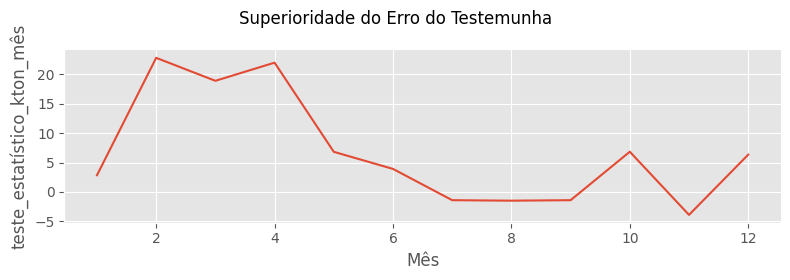



No gráfico acima podemos ver a sazonalidade, lembrando uma curva senoide, que se move suavemente
entre a parte alta e baixa do gráfico.

Vamos identificar o mês com resultado mais positivo para fazer nele o teste de hipótese proposto.

Adicionalmente vamos identificar o mês de resultado mais negativo, para testar também o oposto da hipótese principal,
ou seja, se a inclusão dos dados de chuva nos cálculos pode reduzir a precisão das previsões de importação.


O mês de resultado mais positivo foi o mês 2.


O mês de resultado mais negativo foi o mês 11.


Resultados dos testes no mês mais positivo, mês 2:


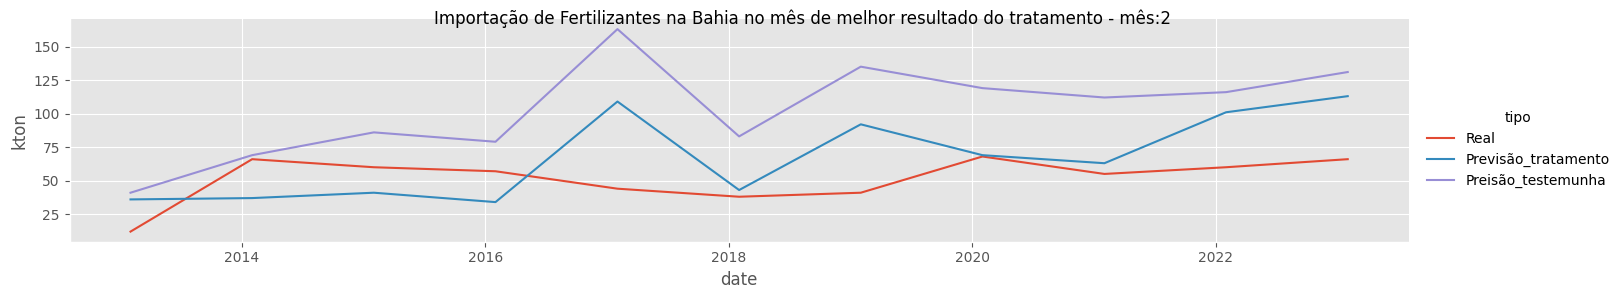



Utilizando a técnica da reamostragem conseguimos visualizar a normalidade da  distribuição dos resultados.


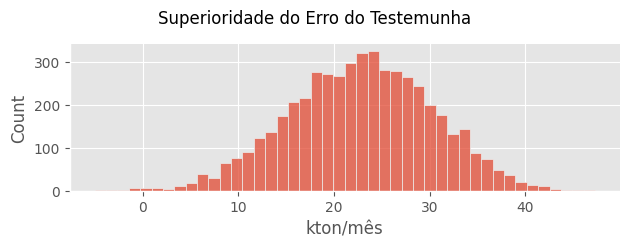

O p_value foi de 0.001.

No mês 2, em média o errou da testemunha ficou 23 kton maior que o tratamento.
Isso corresponde a 82 % a mais de erro.


Pelo método paramétrico, com significância de 0.05, "reject Ho".


 Porém, visualmente se pode notar anormalidades na curva normal criada. Isso ocorre devido a baixo número de amostras originais.


Pelo método paramétrico de reamostragem, é exigido que se tenham no mínimo 30 amostras originais para se proceder
o teste de hipótese. Neste nosso caso, o número de amostras esta bem abaixo, com apenas 11 amostras, o que **invalida**
a reijeição feita acima.

Nessa situação, a alternativa para proceder o teste de hipóteses são os métodos não paramétricos, como o de Wilcoxon:


,p-val
Wilcoxon,0.009277




Por método não paramétrico, com significância de 0.05, "reject Ho".


Enfim, podemos afirmar com significância estatística que levar em conta os dados de chuvas
nas condições aqui determinadas, aumentou a precisão das previsões das importações de fertilizantes.

Vamos aproveitar o conjunto de testes realizados para testar uma nova hipótese, inversa da inicial.

Ho: No mês de resultado mais negativo, mês 11, utilizar os dados de chuva pode reduzir a precisão
da previsão de importação de fertilizantes?


Resultados dos testes no mês mais negativo, mês 11:


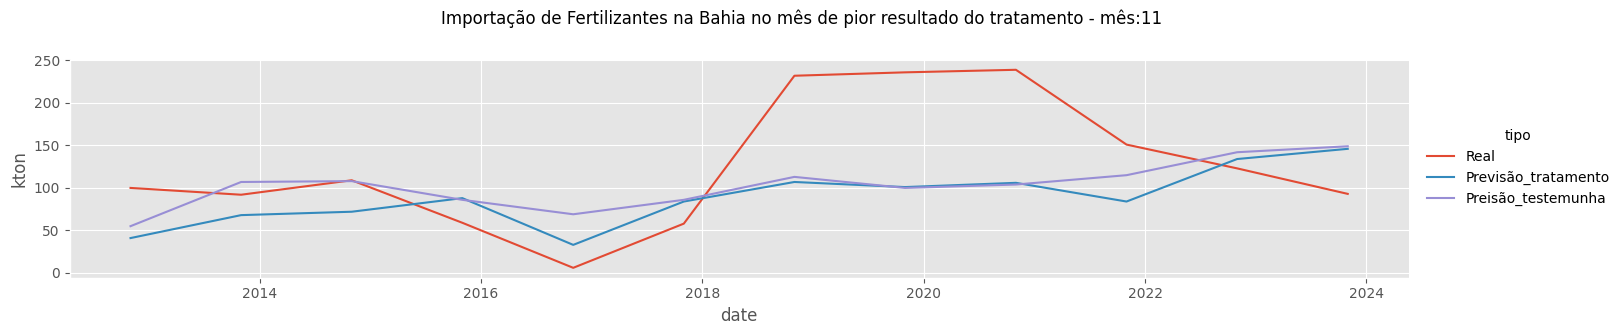



Utilizando a técnica da reamostragem conseguimos visualizar a normalidade da  distribuição dos resultados.


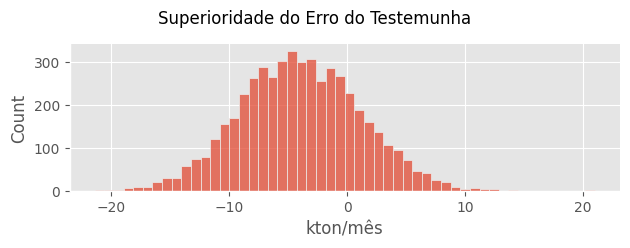

O p_value foi de 0.217.

No mês 11, em média o errou da testemunha ficou 4 kton menor que o tratamento.
Isso corresponde a 7 % a menos de erro.


Pelo método paramétrico, com significância de 0.05, "fail to reject Ho".


Porém, pela mesma razão do teste anterior, visualmente se pode notar anormalidades na curva normal criada.
Isso ocorre devido a baixo número de amostras originais.


Pelo método paramétrico de reamostragem, é exigido que se tenham no mínimo 30 amostras originais para se proceder
o teste de hipótese. Neste nosso caso, o número de amostras esta bem abaixo, com apenas 12 amostras, o que **invalida**
a reijeição feita acima.

Nessa situação, a alternativa para proceder o teste de hipóteses são os métodos não paramétricos, como o de Wilcoxon:


,p-val
Wilcoxon,0.259277




Por método não paramétrico, com significância de 0.05, "fail to reject Ho".


Enfim, NÃO podemos afirmar com significância estatística que levar em conta os dados de chuvas
nas condições aqui determinadas, reduziu a precisão das previsões das importações de fertilizantes.




Conclusão Final

Concatenando as duas conclusões anteriores, sobre utilizar aicionalmente dados de chuva para previsão de importação de fertilizantes:

	* Se pode afirmar com segurança que, ao menos para alguns meses dos ano, a precisão das previsões é aumentada.

	* Não se pode afirmar com segurança que, ao menos para alguns meses dos ano, a precisão das previsões é reduzida.


In [1]:
%run '5. Communicating and visualizing the results.ipynb'